# EDA Quick Start Guide 
by Giancarlo Marchesi

This projects explores the characteristics of commercial airplane flight delays in the United States. The dataset ranges from January 2011 to December 2020.  The observations are reported by month, year, airline and airport. The data was downloaded from the Bureau of Transportation Statistics website https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp. 

The notebook aims to be a how-to guide in performing exploratory data analysis: cleaning, feature engineering and basic plots. The subtitles are sorted according to basic tasks so the reader can use this notebook as future reference for coding and analysis. The book finalizes with a clean data frame.  

## Loading the dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, print statistics
delays= pd.read_csv('airline_delay_causes.csv')

In [3]:
delays.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2011,12,DL,Delta Air Lines Inc.,STL,"St. Louis, MO: St Louis Lambert International",396.0,34.0,13.90,0.68,...,12.89,0.0,0.0,1680.0,698.0,19.0,204.0,0.0,759.0,NaN
1,2011,12,DL,Delta Air Lines Inc.,STT,"Charlotte Amalie, VI: Cyril E King",42.0,4.0,3.09,0.00,...,0.00,0.0,0.0,93.0,75.0,0.0,18.0,0.0,0.0,NaN
2,2011,12,DL,Delta Air Lines Inc.,STX,"Christiansted, VI: Henry E. Rohlsen",3.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2011,12,DL,Delta Air Lines Inc.,SYR,"Syracuse, NY: Syracuse Hancock International",55.0,5.0,2.50,0.00,...,1.00,0.0,1.0,147.0,80.0,0.0,35.0,0.0,32.0,NaN
4,2011,12,DL,Delta Air Lines Inc.,TLH,"Tallahassee, FL: Tallahassee International",31.0,5.0,1.25,0.00,...,2.74,0.0,0.0,332.0,92.0,0.0,39.0,0.0,201.0,NaN


In [4]:
## The size of the data set
delays.shape

(158340, 22)

In [5]:
## The names and types of the variables 
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158340 entries, 0 to 158339
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 158340 non-null  int64  
 1    month               158340 non-null  int64  
 2   carrier              158340 non-null  object 
 3   carrier_name         158340 non-null  object 
 4   airport              158340 non-null  object 
 5   airport_name         158340 non-null  object 
 6   arr_flights          158102 non-null  float64
 7   arr_del15            157906 non-null  float64
 8   carrier_ct           158102 non-null  float64
 9    weather_ct          158102 non-null  float64
 10  nas_ct               158102 non-null  float64
 11  security_ct          158102 non-null  float64
 12  late_aircraft_ct     158102 non-null  float64
 13  arr_cancelled        158102 non-null  float64
 14  arr_diverted         158102 non-null  float64
 15   arr_delay       

### Variables 

The features of the dataset are as follows: 

- The `_ct` variables are the counts of the causes of why flights were delayed.The sum of _ct variables is equl to arr_del15. The variables are are floats instead of integers becuase airlines have attributed more than one cause in percentages to several flights.

- The `arr_` variables are all the possible classifications for a flight arrival: delayed, canceled,

- The `_delay` variables are the number of minutes delayed.`arr_delay` is total number of minutes delayed in that month by an airline in an aiport. The _delay variables are the minutes attributed to the causes. 


- 0 `year`: year of the observation 
- 1 `month`: month of the observation 
- 2 `carrier`: IATA two-letter airline designator
- 3 `carrier_name` : name of the airline
- 4 `airport`: three-letter airport code
- 5 `airport_name`: city and airport full name
- 6 `arr_flights`: total number of arriving flights in the observation
- 7 `arr_del15`: total number of delayed flights in the observation
- 8 `carrier_ct`: number of flight delays attributed to carriers
- 9 `weather_ct`:  number of flight delays attributed to weather
- 10 `nas_ct`: number of flight delays attributed to the national advisory service
- 11 `security_ct`: number of flight delays attributed to security concerns
- 12 `late_aircraft_ct`: number of flight delays because the aircraft was late on its previous trip
- 13 `arr_cancelled`:total number of canceled flights in the observation
- 14 `arr_diverted`:total number of diverted flights in the observation
- 15 `arr_delay`:  total number of minutes delayed in that month by an airline in an aiport
- 16 `carrier_delay`: total number of minutes delayed atrributed to the airline  
- 17 `weather_delay`: total number of minutes delayed atrributed to the weather
- 18 `nas_delay`:  total number of minutes delayed atrributed to the national advisory service
- 19 `security_delay`: total number of minutes delayed atrributed to security concerns
- 20 `late_aircraft_delay`: total number of minutes delayed atrributed to the flight being late on its previous trip  
- 21 `Unnamed: 21`: seems to be an empty variable

## Data cleaning

During this phase we prepare the dataset, getting rid of anomalies in the data like null values, bad spelling in names, separating columns, changing data types, etc. In this section, I perform these tasks using standard strips of commentated code that can be replicated easily in other projects.  

### Changing names of colums with `rename()`

A few columns have been mispelled using an additional blank space at the beginning. We can change these names so that space won't be a nuisance during the analysis phase. We use rename(), which takes a dictionary of the old and new names.  

In [6]:
delays=delays.rename(columns = {' month': 'month', ' weather_ct': 'weather_ct', ' arr_delay': 'arr_delay', ' carrier_delay': 'carrier_delay'})

In [7]:
## Now the names are correct
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158340 entries, 0 to 158339
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 158340 non-null  int64  
 1   month                158340 non-null  int64  
 2   carrier              158340 non-null  object 
 3   carrier_name         158340 non-null  object 
 4   airport              158340 non-null  object 
 5   airport_name         158340 non-null  object 
 6   arr_flights          158102 non-null  float64
 7   arr_del15            157906 non-null  float64
 8   carrier_ct           158102 non-null  float64
 9   weather_ct           158102 non-null  float64
 10  nas_ct               158102 non-null  float64
 11  security_ct          158102 non-null  float64
 12  late_aircraft_ct     158102 non-null  float64
 13  arr_cancelled        158102 non-null  float64
 14  arr_diverted         158102 non-null  float64
 15  arr_delay        

The `arr_delay` variable is total minutes delayed but the name is confusing because all other arr_ variables are the number of flights in a particular arrival status category. It'd be cleaner if it's renamed to `min_delay`

In [8]:
delays=delays.rename(columns = {'arr_delay': 'min_delay'})

### Drop empty columns with `drop()`

In [9]:
### Now dropping all unnecessary columns. Drop takes a list; inplace=True is used instead of delays=delays.drop... 
delays.drop(columns=['Unnamed: 21'], inplace=True)

In [10]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158340 entries, 0 to 158339
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 158340 non-null  int64  
 1   month                158340 non-null  int64  
 2   carrier              158340 non-null  object 
 3   carrier_name         158340 non-null  object 
 4   airport              158340 non-null  object 
 5   airport_name         158340 non-null  object 
 6   arr_flights          158102 non-null  float64
 7   arr_del15            157906 non-null  float64
 8   carrier_ct           158102 non-null  float64
 9   weather_ct           158102 non-null  float64
 10  nas_ct               158102 non-null  float64
 11  security_ct          158102 non-null  float64
 12  late_aircraft_ct     158102 non-null  float64
 13  arr_cancelled        158102 non-null  float64
 14  arr_diverted         158102 non-null  float64
 15  min_delay        

### Exploring the dataset with `count`, `value_counts`, `unique`, `nunique`, `filter` and `describe`

We see that the number of datapoints in between variables is not the same. Before dropping observations, let's get a sense of why this would be the case. 

#### `carrier` & `carrier_name`

Let's check if these two variables coincide. In principle, they should; `carrier` is just the IATA two letter code for the airline. 

In [11]:
delays.carrier.nunique()

22

In [12]:
delays.carrier_name.nunique()

25

They don't coincide. Let's find out why. 

In [13]:
### by using the filter on these columns we have a smaller df
explore=delays.filter(['carrier', 'carrier_name'], axis=1)

In [14]:
## by applying describe to the groupby method, it gives the summary statistics 
explore.groupby('carrier_name').describe()

carrier                  
                               count unique top   freq
carrier_name                                          
AirTran Airways Corporation     2314      1  FL   2314
Alaska Airlines Inc.            7421      1  AS   7421
Allegiant Air                   4287      1  G4   4287
American Airlines Inc.         10732      1  AA  10732
American Eagle Airlines Inc.    5208      1  MQ   5208
Atlantic Southeast Airlines     1442      1  EV   1442
Continental Air Lines Inc.       688      1  CO    688
Delta Air Lines Inc.           16389      1  DL  16389
Endeavor Air Inc.               4294      1  9E   4294
Envoy Air                       7473      1  MQ   7473
ExpressJet Airlines Inc.       14556      2  EV  13159
ExpressJet Airlines LLC         1436      1  EV   1436
Frontier Airlines Inc.          7870      1  F9   7870
Hawaiian Airlines Inc.          1983      1  HA   1983
JetBlue Airways                 7091      1  B6   7091
Mesa Airlines Inc.              6491      1  YV   6491
PSA Airlines Inc.               3290      1  OH   3290
Pinnacle Airlines Inc.           800      1  9E    800
Republic Airline                3086      1  YX   3086
SkyWest Airlines Inc.          22710      1  OO  22710
Southwest Airlines Co.         10072      1  WN  10072
Spirit Air Lines                2906      1  NK   2906
US Airways Inc.                 4073      1  US   4073
United Air Lines Inc.          10300      1  UA  10300
Virgin America                  1428      1  VX   1428

There are three carrier codes that need to be cleaned: <br>
After a quick Wikipedia search, I obtained the following data: 

-`EV`: there are 4 names associated to the carrier code EV. 
ExpressJet Airlines LLC and Atlantic Southeast Airlines. Atlantic SoutheEast Merged with ExpressJet and received a single  operating certificate from the FAA in December of 2011. 
Express Jet LLC eventually changed names to ExpressJet Airlines Inc, so the three names are the same company.
ExpressJet Airlines Inc has two carrier codes associated: EV and XE.

-`9E`: is now Endeavor Air, but was formerly called Pinnacle Airlines

-`MQ`: MQ is now Envoy Air, but was formerly American Eagle Airlines

**Let's analyze the ExpressJet problem more closely.**

In [15]:
## another way of achieving the same result. It
dfev=delays[delays['carrier']=='EV']

In [16]:
dfev.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,min_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
10,2011,12,EV,Atlantic Southeast Airlines,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",53.0,5.0,2.41,0.0,...,0.08,2.48,0.0,0.0,567.0,273.0,0.0,5.0,9.0,280.0
11,2011,12,EV,Atlantic Southeast Airlines,ABY,"Albany, GA: Southwest Georgia Regional",86.0,20.0,7.47,0.0,...,0.00,9.94,0.0,0.0,1288.0,490.0,0.0,118.0,0.0,680.0
12,2011,12,EV,Atlantic Southeast Airlines,AEX,"Alexandria, LA: Alexandria International",116.0,26.0,15.06,0.0,...,0.00,7.98,0.0,0.0,1501.0,867.0,0.0,114.0,0.0,520.0


In [17]:
dfev.carrier_name.unique()

array(['Atlantic Southeast Airlines', 'ExpressJet Airlines Inc.',
       'ExpressJet Airlines LLC'], dtype=object)

In [18]:
## Keeping a df with only ExpressJet Airlines Inc.
dfev1=delays[delays['carrier_name'] == "ExpressJet Airlines Inc."]

In [19]:
dfev1.carrier.unique()

array(['XE', 'EV'], dtype=object)

##### Replacing values in rows using `replace()`

Let's get rid of the multiple names for EV, by replacing all with ExpressJet Airlines Inc

In [20]:
delays.carrier_name.replace({'Atlantic Southeast Airlines':'ExpressJet Airlines Inc.', 'ExpressJet Airlines LLC':'ExpressJet Airlines Inc.'}, inplace=True)

In [21]:
delays.carrier_name.nunique()

23

We're down from 25 to 23. 

In [22]:
## Checking that the values have been replaced
delays.carrier_name.value_counts()

SkyWest Airlines Inc.           22710
ExpressJet Airlines Inc.        17434
Delta Air Lines Inc.            16389
American Airlines Inc.          10732
United Air Lines Inc.           10300
Southwest Airlines Co.          10072
Frontier Airlines Inc.           7870
Envoy Air                        7473
Alaska Airlines Inc.             7421
JetBlue Airways                  7091
Mesa Airlines Inc.               6491
American Eagle Airlines Inc.     5208
Endeavor Air Inc.                4294
Allegiant Air                    4287
US Airways Inc.                  4073
PSA Airlines Inc.                3290
Republic Airline                 3086
Spirit Air Lines                 2906
AirTran Airways Corporation      2314
Hawaiian Airlines Inc.           1983
Virgin America                   1428
Pinnacle Airlines Inc.            800
Continental Air Lines Inc.        688
Name: carrier_name, dtype: int64

Regarding the XE carrier code, according to wikipedia it belongs to JetSuiteX, an independent airline that does regional flights in the West Coast (California, Nevada, Arizona, Texas, Utah). It is not affiliated with ExpressJet in anyway https://en.wikipedia.org/wiki/JSX_(airline) This seems odd. Let's look a bit closer.

In [23]:
dfxe= delays[delays['carrier']=='XE']

In [24]:
dfxe.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,min_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
750,2011,12,XE,ExpressJet Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",112.0,17.0,4.86,0.00,...,0.0,8.58,1.0,1.0,1132.0,330.0,0.0,103.0,0.0,699.0
751,2011,12,XE,ExpressJet Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",100.0,21.0,9.62,0.28,...,0.0,8.28,2.0,0.0,1300.0,498.0,23.0,161.0,0.0,618.0
752,2011,12,XE,ExpressJet Airlines Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,14.0,6.20,0.00,...,0.0,5.57,1.0,0.0,811.0,317.0,0.0,62.0,0.0,432.0
753,2011,12,XE,ExpressJet Airlines Inc.,ALB,"Albany, NY: Albany International",123.0,8.0,2.89,0.00,...,0.0,2.60,0.0,0.0,401.0,174.0,0.0,78.0,0.0,149.0
754,2011,12,XE,ExpressJet Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",165.0,41.0,12.19,2.25,...,0.0,15.78,11.0,3.0,2538.0,681.0,136.0,658.0,0.0,1063.0


In [25]:
dfxe['carrier_name'].unique()

array(['ExpressJet Airlines Inc.'], dtype=object)

In [26]:
dfxe['year'].unique()

array([2011], dtype=int64)

There isn't any other airline than ExpressJet. There is no mention of JetSuiteX. Furthermore, the observations for XE are all from 2011. It seems like this is an error in the data compilation. I will replace XE with EV for these observations.

In [27]:
delays.carrier.replace({'XE':'EV'}, inplace=True)

In [28]:
## XE has been replaced
delays.carrier.unique()

array(['DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US', 'WN', 'YV',
       'AA', 'AS', 'B6', 'VX', 'NK', 'OH', 'YX', '9E', 'G4', 'CO'],
      dtype=object)

In [29]:
delays.carrier_name.replace({'Pinnacle Airlines Inc.':'Endeavor Air Inc.', 'American Eagle Airlines Inc.':'Envoy Air'}, inplace=True)

In [30]:
delays[delays['carrier'] == 'MQ'].head() 

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,min_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
256,2011,12,MQ,Envoy Air,ABI,"Abilene, TX: Abilene Regional",204.0,54.0,24.00,2.28,...,0.0,15.06,2.0,0.0,2229.0,864.0,131.0,389.0,0.0,845.0
257,2011,12,MQ,Envoy Air,ABQ,"Albuquerque, NM: Albuquerque International Sun...",141.0,25.0,4.94,2.19,...,0.0,6.91,5.0,0.0,1030.0,129.0,133.0,363.0,0.0,405.0
258,2011,12,MQ,Envoy Air,AEX,"Alexandria, LA: Alexandria International",91.0,18.0,4.49,1.91,...,0.0,4.20,0.0,0.0,885.0,171.0,124.0,395.0,0.0,195.0
259,2011,12,MQ,Envoy Air,AGS,"Augusta, GA: Augusta Regional at Bush Field",58.0,13.0,6.71,1.73,...,0.0,2.36,0.0,0.0,515.0,200.0,122.0,87.0,0.0,106.0
260,2011,12,MQ,Envoy Air,AMA,"Amarillo, TX: Rick Husband Amarillo International",161.0,37.0,12.36,6.79,...,0.0,10.69,5.0,2.0,1526.0,634.0,324.0,186.0,0.0,382.0


In [31]:
delays.carrier_name.nunique()

21

In [32]:
delays.carrier.nunique()

21

*We now have the same number of carrier names as carrier codes.*

#### `airport` & `airport_name`

The variable airport is the short form of name, whereas airport_name is the long form. There are 391 airports codes and airport names. This seems to be ok.

In [33]:
delays.airport.nunique()

391

In [34]:
delays.airport_name.nunique()

391

According to the BTS website, in December of 2020 of 87.09% of flights were on time, 11.72% were delayed, 1.04% were cancelled and 0.15% were diverted. Lets replicate this number and see if we understood the meaning of the variables correctly and if is necessary to generate transformations for further analysis.

In [35]:
## Creating a smaller dataframe for analysis
explore1=delays.filter(['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted'], axis=1)

In [36]:
explore1.head(5)

,arr_flights,arr_del15,arr_cancelled,arr_diverted
0,396.0,34.0,0.0,0.0
1,42.0,4.0,0.0,0.0
2,3.0,0.0,0.0,0.0
3,55.0,5.0,0.0,1.0
4,31.0,5.0,0.0,0.0


It seems that `arr_flights` is the amount of total flights. Although variables are floats, they are really whole numbers. We need a column that represents number of flights that arrived on time.

Creating the `arr_ontime` variable is going to make it easier to determine which rows we'll need to drop because of missing values. 

In [37]:
## This new variable would be the difference between total and other categories
delays['arr_ontime']=delays['arr_flights']-delays['arr_del15']-delays['arr_diverted']-delays['arr_cancelled']

In [38]:
explore2=delays.filter(['arr_flights','arr_ontime','arr_del15', 'arr_cancelled', 'arr_diverted'], axis=1)

In [39]:
explore2.head()

,arr_flights,arr_ontime,arr_del15,arr_cancelled,arr_diverted
0,396.0,362.0,34.0,0.0,0.0
1,42.0,38.0,4.0,0.0,0.0
2,3.0,3.0,0.0,0.0,0.0
3,55.0,49.0,5.0,0.0,1.0
4,31.0,26.0,5.0,0.0,0.0


*Now, replicating the numbers for December 2020.*

In [40]:
df_dec20 =delays[(delays.year == 2020) & (delays.month == 12)]

In [41]:
## Calculating the share of flights that arrived on time
df_dec20.arr_ontime.sum()/df_dec20.arr_flights.sum()

0.8708816583503206

We were able to replicate the 87.09% from the BTS website for flights ontime. The variable `arr_ontime` is, therefore, representative of what we wanted to analyze. Other variables are replicated as well.

### Splitting a variable into separate ones with `str.split()`

It would be helpful for future analysis to have the name and state where the airports are located in separate columns. We can extract city and state from `aiport_name`.

In [42]:
delays['airport_name']

0             St. Louis, MO: St Louis Lambert International
1                        Charlotte Amalie, VI: Cyril E King
2                       Christiansted, VI: Henry E. Rohlsen
3              Syracuse, NY: Syracuse Hancock International
4                Tallahassee, FL: Tallahassee International
                                ...                        
158335                 Richmond, VA: Richmond International
158336    Roanoke, VA: Roanoke Blacksburg Regional Woodr...
158337       Rochester, NY: Greater Rochester International
158338               Rochester, MN: Rochester International
158339           San Antonio, TX: San Antonio International
Name: airport_name, Length: 158340, dtype: object

In [43]:
## Splitting airport name in two different columns, to the right and left of the semicolon
delays[['city_state', 'long_name']] = delays['airport_name'].str.split(':', expand=True)

In [44]:
### Now, extracting city and state from city_state
delays[['city', 'state']] = delays['city_state'].str.split(',', expand=True)

In [45]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158340 entries, 0 to 158339
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 158340 non-null  int64  
 1   month                158340 non-null  int64  
 2   carrier              158340 non-null  object 
 3   carrier_name         158340 non-null  object 
 4   airport              158340 non-null  object 
 5   airport_name         158340 non-null  object 
 6   arr_flights          158102 non-null  float64
 7   arr_del15            157906 non-null  float64
 8   carrier_ct           158102 non-null  float64
 9   weather_ct           158102 non-null  float64
 10  nas_ct               158102 non-null  float64
 11  security_ct          158102 non-null  float64
 12  late_aircraft_ct     158102 non-null  float64
 13  arr_cancelled        158102 non-null  float64
 14  arr_diverted         158102 non-null  float64
 15  min_delay        

In [46]:
## Let's check the results quickly
delays[['long_name', 'city', 'state']].head(3)

,long_name,city,state
0,St Louis Lambert International,St. Louis,MO
1,Cyril E King,Charlotte Amalie,VI
2,Henry E. Rohlsen,Christiansted,VI


This looks ok. So we can drop the redundant columns. 

In [47]:
delays = delays.drop(columns=['city_state', 'airport_name'])

In [48]:
## Renaming a column
delays.rename(columns={'long_name': 'airport_name'}, inplace=True)

In [49]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158340 entries, 0 to 158339
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 158340 non-null  int64  
 1   month                158340 non-null  int64  
 2   carrier              158340 non-null  object 
 3   carrier_name         158340 non-null  object 
 4   airport              158340 non-null  object 
 5   arr_flights          158102 non-null  float64
 6   arr_del15            157906 non-null  float64
 7   carrier_ct           158102 non-null  float64
 8   weather_ct           158102 non-null  float64
 9   nas_ct               158102 non-null  float64
 10  security_ct          158102 non-null  float64
 11  late_aircraft_ct     158102 non-null  float64
 12  arr_cancelled        158102 non-null  float64
 13  arr_diverted         158102 non-null  float64
 14  min_delay            158102 non-null  float64
 15  carrier_delay    

### Drop missing values with `dropna()`

Next, let's check for null values, analyze their causes and take the necessary action. 

In [50]:
## this command line determines the number of nulls in each column 
delays.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
arr_flights            238
arr_del15              434
carrier_ct             238
weather_ct             238
nas_ct                 238
security_ct            238
late_aircraft_ct       238
arr_cancelled          238
arr_diverted           238
min_delay              238
carrier_delay          238
weather_delay          238
nas_delay              238
security_delay         238
late_aircraft_delay    238
arr_ontime             434
airport_name             0
city                     0
state                    0
dtype: int64

`arr_del15` has 434 missing values (0.3% of the total) and as a consequence, the recently created `arr_ontime`. Any analysis of number of delayed flights will need to exclude the months/airports that don't have information. Other delay related values have 238 missing values. Since these numbers are small in terms of the sample size, we will delete these observations. 

In [51]:
## This command line deletes all rows with missing values 
delays.dropna(axis=0, inplace=True)

In [52]:
delays.isna().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
min_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
arr_ontime             0
airport_name           0
city                   0
state                  0
dtype: int64

In [53]:
delays.shape

(157906, 24)

**There are no more nan values. The final dataset has 157906 observations.**

## Feature engineering

### Creating percentage variables for ontime and delay categories

Percentage variables for the four flight status: ontime, delayed, diverted or cancelled, will be particularly useful to create visualizations. In this section, we add them to the dataframe. 

In [54]:
delays['perontime']=delays['arr_ontime']/delays['arr_flights']
delays['perdelay']=delays['arr_del15']/delays['arr_flights']
delays['percancelled']=delays['arr_cancelled']/delays['arr_flights']
delays['perdiverted']=delays['arr_diverted']/delays['arr_flights']

In [55]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157906 entries, 0 to 158339
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 157906 non-null  int64  
 1   month                157906 non-null  int64  
 2   carrier              157906 non-null  object 
 3   carrier_name         157906 non-null  object 
 4   airport              157906 non-null  object 
 5   arr_flights          157906 non-null  float64
 6   arr_del15            157906 non-null  float64
 7   carrier_ct           157906 non-null  float64
 8   weather_ct           157906 non-null  float64
 9   nas_ct               157906 non-null  float64
 10  security_ct          157906 non-null  float64
 11  late_aircraft_ct     157906 non-null  float64
 12  arr_cancelled        157906 non-null  float64
 13  arr_diverted         157906 non-null  float64
 14  min_delay            157906 non-null  float64
 15  carrier_delay    

The variable `arr_del15` is the number of flights that were delayed. The _ct variables are the counts of the causes of why flights were delayed. The sum of _ct variables is equal to `arr_del15`. The variables are floats instead of integers becuase airlines must have attributed more than one cause in percentages to several flights. Another helpful view for visualizations would be to have the percentages of causes attributed for each type of delay.

To understand the true effects of weather on delays, we need to dive a bit deeper. According to the BTS website, https://www.bts.dot.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations
"A true picture of total weather-related delays requires several steps. First, the extreme weather delays must be combined with the NAS weather category. Second, a calculation must be made to determine the weather-related delays included in the "late-arriving aircraft" category. Airlines do not report the causes of the late-arriving aircraft but an allocation can be made using the proportion of weather related-delays and total flights in the other categories. Adding the weather-related delays to the extreme weather and NAS weather categories would result in weather's share of all flight delays".

Furthermore, according to BTS, "Delays or cancellations coded "NAS" are the type of weather delays that could be reduced with corrective action by the airports or the Federal Aviation Administration. During 2020, 45.8% of NAS delays were due to weather. NAS delays were 33.4% of total delays in 2020."

Although, NAS is an important factor in determining weather delays, the data set does not provide a vector with the share of NAS delays attributed to weather accross time. Hence, we cannot use this only point estimate from 2020 and attribute it to the whole dataset. Furthermore, the share of "late-arriving aircraft" seems to also be dependent on this first correction. Deriving conclusions from such an approximation would be innacurate. Hence, the cause of delays data will be analyzed at face value, across time, seasonality, carriers and airports, with the caveat that we now know that an important part of other delay causes are also weather related.

In [56]:
delays['per_car_delay']=delays['carrier_delay']/delays['min_delay']
delays['per_wea_delay']=delays['weather_delay']/delays['min_delay']
delays['per_nas_delay']=delays['nas_delay']/delays['min_delay']
delays['per_sec_delay']=delays['security_delay']/delays['min_delay']
delays['per_late_delay']=delays['late_aircraft_delay']/delays['min_delay']

In [57]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157906 entries, 0 to 158339
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 157906 non-null  int64  
 1   month                157906 non-null  int64  
 2   carrier              157906 non-null  object 
 3   carrier_name         157906 non-null  object 
 4   airport              157906 non-null  object 
 5   arr_flights          157906 non-null  float64
 6   arr_del15            157906 non-null  float64
 7   carrier_ct           157906 non-null  float64
 8   weather_ct           157906 non-null  float64
 9   nas_ct               157906 non-null  float64
 10  security_ct          157906 non-null  float64
 11  late_aircraft_ct     157906 non-null  float64
 12  arr_cancelled        157906 non-null  float64
 13  arr_diverted         157906 non-null  float64
 14  min_delay            157906 non-null  float64
 15  carrier_delay    

Some `min_delays` could have been zeros, creating several NaN in the new variables. We will fill them out with zeros. 

In [58]:
delays ['per_car_delay'] = delays['per_car_delay'].fillna(0)
delays ['per_wea_delay'] = delays['per_wea_delay'].fillna(0)
delays ['per_nas_delay'] = delays['per_nas_delay'].fillna(0)
delays ['per_sec_delay'] = delays['per_sec_delay'].fillna(0)
delays ['per_late_delay'] = delays['per_late_delay'].fillna(0)

In [59]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157906 entries, 0 to 158339
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 157906 non-null  int64  
 1   month                157906 non-null  int64  
 2   carrier              157906 non-null  object 
 3   carrier_name         157906 non-null  object 
 4   airport              157906 non-null  object 
 5   arr_flights          157906 non-null  float64
 6   arr_del15            157906 non-null  float64
 7   carrier_ct           157906 non-null  float64
 8   weather_ct           157906 non-null  float64
 9   nas_ct               157906 non-null  float64
 10  security_ct          157906 non-null  float64
 11  late_aircraft_ct     157906 non-null  float64
 12  arr_cancelled        157906 non-null  float64
 13  arr_diverted         157906 non-null  float64
 14  min_delay            157906 non-null  float64
 15  carrier_delay    

In [60]:
delays.isna().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
min_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
arr_ontime             0
airport_name           0
city                   0
state                  0
perontime              0
perdelay               0
percancelled           0
perdiverted            0
per_car_delay          0
per_wea_delay          0
per_nas_delay          0
per_sec_delay          0
per_late_delay         0
dtype: int64

### Adding latitude and longitude to the dataframe using dictionaries

Having the latitude and longitude in the dataframe could be useful for geopandas visualizations. I will read in a separate csv file that has aiport codes and their latitudes and longitudes  

In [61]:
lat_long= pd.read_csv('airport_latlong.csv', sep=";")

In [62]:
lat_long.head(3)

,airport,latitude,longitude
0,ABE,40.652100,-75.440804
1,ABI,32.411301,-99.681900
2,ABQ,35.040199,-106.609001


In [63]:
### creating a latitude dictionary
### https://cmdlinetips.com/2021/04/convert-two-column-values-from-pandas-dataframe-to-a-dictionary/
dict_lat=dict(zip(lat_long.airport, lat_long.latitude))

In [64]:
### creating a longitude dictionary 
dict_long=dict(zip(lat_long.airport, lat_long.longitude))

In [65]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157906 entries, 0 to 158339
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 157906 non-null  int64  
 1   month                157906 non-null  int64  
 2   carrier              157906 non-null  object 
 3   carrier_name         157906 non-null  object 
 4   airport              157906 non-null  object 
 5   arr_flights          157906 non-null  float64
 6   arr_del15            157906 non-null  float64
 7   carrier_ct           157906 non-null  float64
 8   weather_ct           157906 non-null  float64
 9   nas_ct               157906 non-null  float64
 10  security_ct          157906 non-null  float64
 11  late_aircraft_ct     157906 non-null  float64
 12  arr_cancelled        157906 non-null  float64
 13  arr_diverted         157906 non-null  float64
 14  min_delay            157906 non-null  float64
 15  carrier_delay    

In [66]:
## adding latitude
lats=[]
for i in delays['airport']:
    for key, value in dict_lat.items(): 
        if key == i:
            lats.append(value)

In [67]:
len(lats)

157906

In [68]:
delays['latitude']=lats

In [69]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157906 entries, 0 to 158339
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 157906 non-null  int64  
 1   month                157906 non-null  int64  
 2   carrier              157906 non-null  object 
 3   carrier_name         157906 non-null  object 
 4   airport              157906 non-null  object 
 5   arr_flights          157906 non-null  float64
 6   arr_del15            157906 non-null  float64
 7   carrier_ct           157906 non-null  float64
 8   weather_ct           157906 non-null  float64
 9   nas_ct               157906 non-null  float64
 10  security_ct          157906 non-null  float64
 11  late_aircraft_ct     157906 non-null  float64
 12  arr_cancelled        157906 non-null  float64
 13  arr_diverted         157906 non-null  float64
 14  min_delay            157906 non-null  float64
 15  carrier_delay    

Lets check that the values are in the right order. 

In [70]:
delays.head()

,year,month,carrier,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,...,perontime,perdelay,percancelled,perdiverted,per_car_delay,per_wea_delay,per_nas_delay,per_sec_delay,per_late_delay,latitude
0,2011,12,DL,Delta Air Lines Inc.,STL,396.0,34.0,13.90,0.68,6.53,...,0.914141,0.085859,0.0,0.000000,0.415476,0.01131,0.121429,0.0,0.451786,38.748697
1,2011,12,DL,Delta Air Lines Inc.,STT,42.0,4.0,3.09,0.00,0.91,...,0.904762,0.095238,0.0,0.000000,0.806452,0.00000,0.193548,0.0,0.000000,18.335700
2,2011,12,DL,Delta Air Lines Inc.,STX,3.0,0.0,0.00,0.00,0.00,...,1.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,17.699500
3,2011,12,DL,Delta Air Lines Inc.,SYR,55.0,5.0,2.50,0.00,1.50,...,0.890909,0.090909,0.0,0.018182,0.544218,0.00000,0.238095,0.0,0.217687,43.111198
4,2011,12,DL,Delta Air Lines Inc.,TLH,31.0,5.0,1.25,0.00,1.00,...,0.838710,0.161290,0.0,0.000000,0.277108,0.00000,0.117470,0.0,0.605422,30.396500


In [423]:
## checking if it worked
dict_lat

{'ABE': 40.65209961,
 'ABI': 32.41130066,
 'ABQ': 35.040199,
 'ABY': 31.53549957,
 'ACT': 31.61129951,
 'ACV': 40.97809982,
 'ACY': 39.45759964,
 'ADK': 51.87799835,
 'ADQ': 57.75,
 'AEX': 31.32740021,
 'AGS': 33.36989975,
 'ALB': 42.74829865,
 'AMA': 35.219398,
 'ANC': 61.17440033,
 'ASE': 39.22320175,
 'ATL': 33.63669968,
 'ATW': 44.2580986,
 'AUS': 30.19449997,
 'AVL': 35.43619919,
 'AVP': 41.33850098,
 'AZO': 42.23490143,
 'BDL': 41.93889999,
 'BET': 60.77980042,
 'BFL': 35.43360138,
 'BGM': 42.20869827,
 'BHM': 33.56290054,
 'BIL': 45.80770111,
 'BIS': 46.77270126,
 'BKG': 36.532082,
 'BLI': 48.7928009,
 'BMI': 40.47710037,
 'BNA': 36.12450027,
 'BOI': 43.56439972,
 'BOS': 42.36429977,
 'BQK': 31.25880051,
 'BQN': 18.4903,
 'BRO': 25.90679932,
 'BRW': 71.285402,
 'BTM': 45.95479965,
 'BTR': 30.53319931,
 'BTV': 44.47190094,
 'BUF': 42.94049835,
 'BUR': 34.20069885,
 'BWI': 39.17539978,
 'BZN': 45.77750015,
 'CAE': 33.93880081,
 'CAK': 40.91609955,
 'CDC': 37.70100021,
 'CDV': 60.4

The first five in the dataframe indeed match the corresponding values for the airport codes. Lets repeat this for longitude.  

In [75]:
## adding longitude
long=[]
for i in delays['airport']:
    for key, value in dict_long.items(): 
        if key == i:
            long.append(value)

In [76]:
len(long)

157906

In [77]:
delays['longitude']=long

In [78]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157906 entries, 0 to 158339
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 157906 non-null  int64  
 1   month                157906 non-null  int64  
 2   carrier              157906 non-null  object 
 3   carrier_name         157906 non-null  object 
 4   airport              157906 non-null  object 
 5   arr_flights          157906 non-null  float64
 6   arr_del15            157906 non-null  float64
 7   carrier_ct           157906 non-null  float64
 8   weather_ct           157906 non-null  float64
 9   nas_ct               157906 non-null  float64
 10  security_ct          157906 non-null  float64
 11  late_aircraft_ct     157906 non-null  float64
 12  arr_cancelled        157906 non-null  float64
 13  arr_diverted         157906 non-null  float64
 14  min_delay            157906 non-null  float64
 15  carrier_delay    

The data set is ready. Further feature engineering will be needed after grouping by airports or airlines. We will see that in the next notebook, visualizations_quickstart_airports. 

## Exploratory data analysis

The objective of this section is to get a quick sense of what the dataset looks like. I will use some common plots in Matplotlib and Seaborn. 

### Number of observations per year

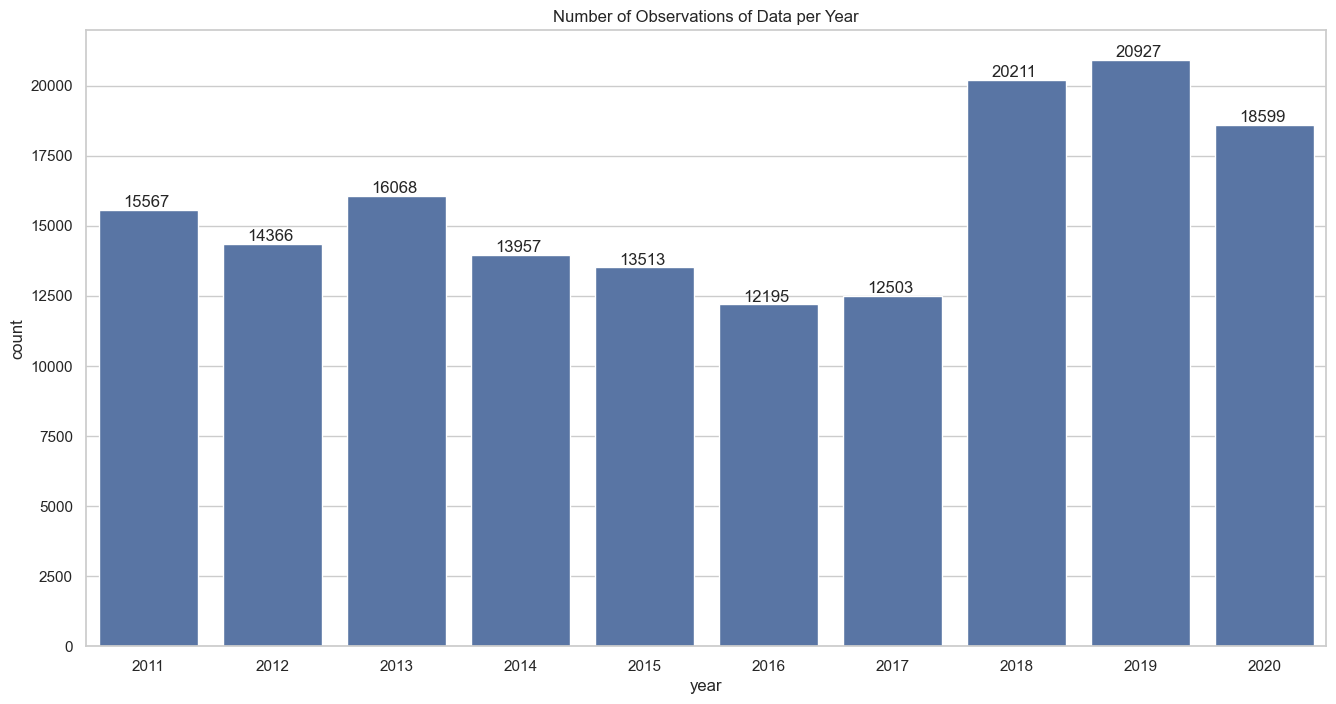

In [435]:
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")
base_color = sns.color_palette()[0]
ax=sns.countplot(data=delays, x='year', color=base_color)

plt.title('Number of Observations of Data per Year');

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))

Something is happening between 2016-2017 and 2018-2020. More airlines? More airports? This needs a deeper dive. 

### Number of observations per month

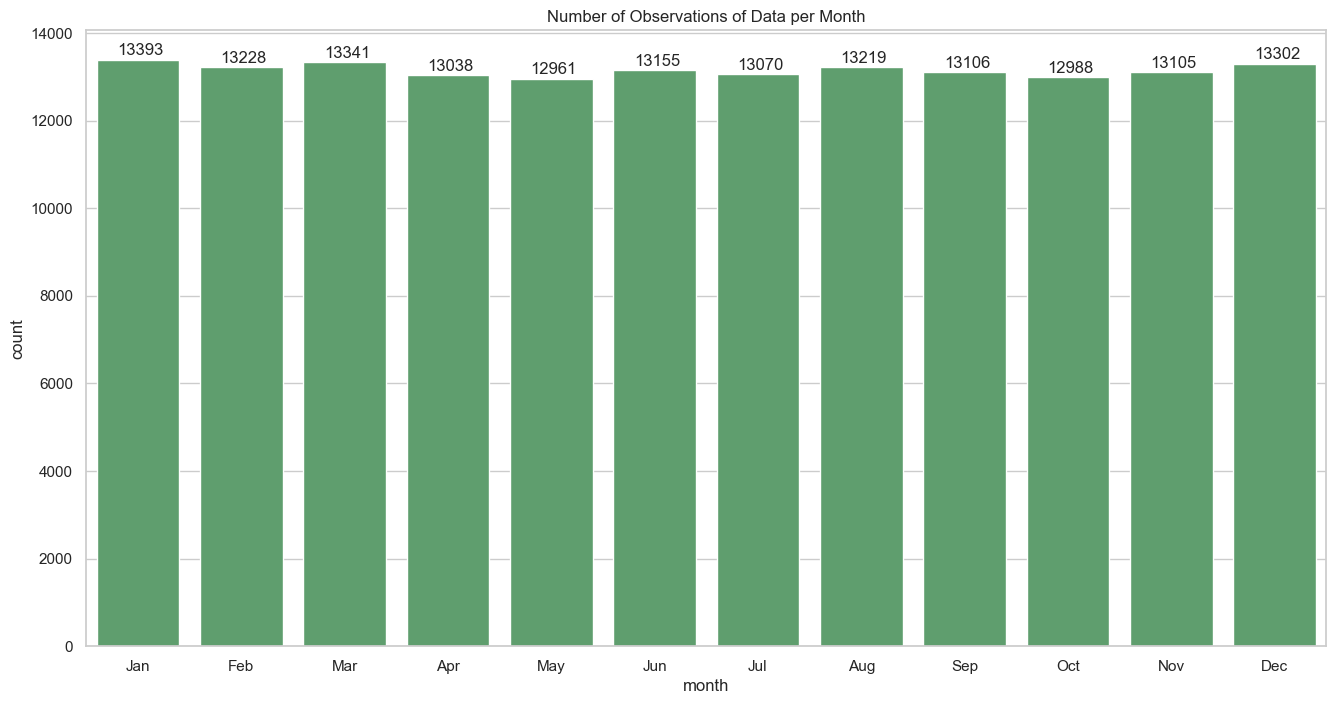

In [436]:
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")
base_color = sns.color_palette()[2]
ax=sns.countplot(data=delays, x='month', color=base_color)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Number of Observations of Data per Month');

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))

The number of observations per month seems to be even. 

### Airline share of observations in the dataset

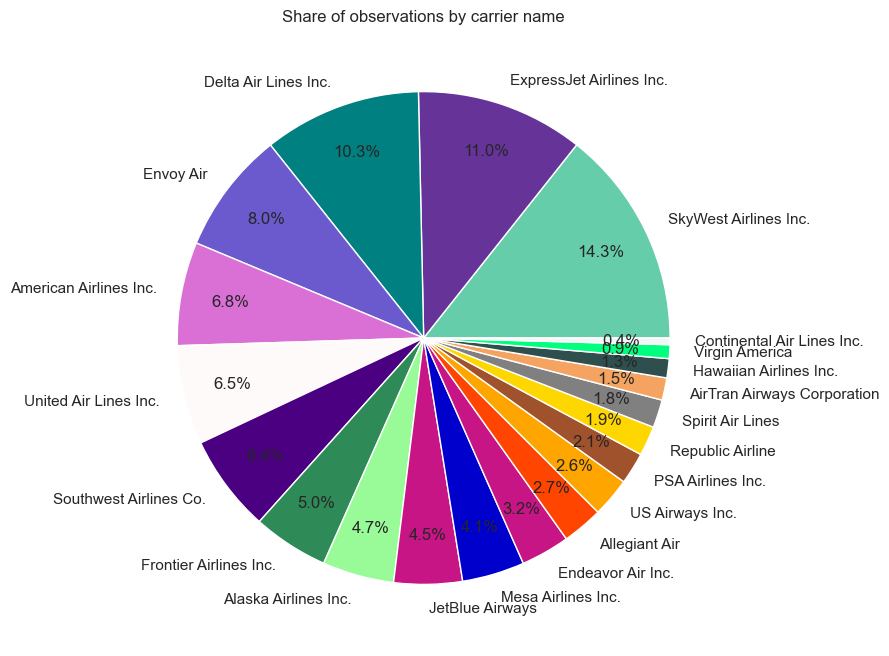

In [439]:
import random
import matplotlib.colors as mcolors
airlines = delays['carrier_name'].value_counts()
n_colors=delays['carrier_name'].nunique()
pie, ax = plt.subplots(figsize=[8,8])
labels = airlines.keys()
random.seed(2050) 
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = n_colors)
plt.pie(x=airlines, autopct="%.1f%%", labels=labels, colors=colors, pctdistance=0.8, counterclock=True, startangle=0)
plt.title("Share of observations by carrier name", fontsize=12);

This view shows the share of observations in the dataset, which is not necessarily the same as market share. Observations are at the airport, airline, month, year. However, within each airline, the number of flights per airport varies. This would be the true metric of market share. We'll explore it in more detail in the next notebook. 

### Airport share of observations in the dataset

In [440]:
airporttop10=delays.airport.value_counts().head(10)

In [441]:
airporttop10

DCA    1477
DTW    1470
MSY    1462
ATL    1461
LAX    1445
RDU    1443
AUS    1432
MCI    1428
PIT    1410
PHL    1405
Name: airport, dtype: int64

On average, the top ten airports, by number of observations, reported data every month (10 years times 12 months) and at least 12 airlines to total more than 1400 observations. The median airport could have also reported for every month, but on average, for 1,6 airlines. The tail of the distribution (the last quartile) has less than one airline per month every year. However, these are not necessarily the busiest. We will cross in the bivariate analysis the number of flights.  

In [442]:
airportbot10=delays.airport.value_counts().tail(10)

In [443]:
airportbot10

FLO    6
UTM    5
TEX    4
IPT    3
ALS    2
VCT    2
JST    1
FNL    1
YNG    1
TUP    1
Name: airport, dtype: int64

The bottom 10 have less than 10 observations each. 

The preliminary analysis is concluded. Let's export the data set and continue the analysis with more in depth visualizations. 

In [79]:
## Exporting the clean dataframe. We will use it in the next notebook
delays.to_csv('delays_clean.csv',index=False)